## Etapa 1: Instalação das bibliotecas

In [1]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  11632      0 --:--:-- --:--:-- --:--:-- 11586
OK


In [2]:
!apt-get update && apt-get install tensorflow-model-server #adicionado apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,622 B]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InReleas

In [3]:
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 53.6MB/s 
     |████████████████████████████████| 450kB 52.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=830823e706c48c742baea9a59d18c964bd5ff5b1cc79a5428f559f76eb471bec
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:

In [4]:
!pip install requests

## Etapa 2: Importação das bibliotecas

In [5]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

Instructions for updating:
non-resource variables are not supported in the long term


'2.0.0'

## Etapa 3: Pré-processamento

### Carregando a base de dados

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Normalização das imagens

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Etapa 4: Definição do modelo

NOTA: Estamos usando o mesmo modelo da seção sobre Redes Neurais Convolucionais

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Compilando o modelo

In [13]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

### Treinando o modelo

In [14]:
model.fit(X_train, 
          y_train, 
          batch_size=128, 
          epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 222us/sample - loss: 1.4867 - sparse_categorical_accuracy: 0.4633
Epoch 2/10
50000/50000 [==============================] - 4s 87us/sample - loss: 1.0310 - sparse_categorical_accuracy: 0.6393
Epoch 3/10
50000/50000 [==============================] - 4s 87us/sample - loss: 0.8593 - sparse_categorical_accuracy: 0.7011
Epoch 4/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.7392 - sparse_categorical_accuracy: 0.7425
Epoch 5/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.6396 - sparse_categorical_accuracy: 0.7771
Epoch 6/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.5552 - sparse_categorical_accuracy: 0.8063
Epoch 7/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.4747 - sparse_categorical_accuracy: 0.8343
Epoch 8/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.3946 - spa

### Avaliação do modelo

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.9377 - sparse_categorical_accuracy: 0.7434


In [16]:
print("Test accuracy is {}".format(test_accuracy))

Test accuracy is 0.743399977684021


## Etapa 5: Salvando o modelo para produção

### Criando o diretório para o modelo

In [17]:
model_dir = "model/"
version = 1

In [18]:
export_path = os.path.join(model_dir, str(version))
export_path

'model/1'

In [19]:
if os.path.isdir(export_path):
  !rm -r {export_path}

### Salvando o modelo para o TensorFlow Serving

In [20]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(?, 32, 32, 3) dtype=float32>

In [21]:
model.outputs

[<tf.Tensor 'dense_1/Softmax:0' shape=(?, 10) dtype=float32>]

In [22]:
o = {t.name: t for t in model.outputs}

In [23]:
o

{'dense_1/Softmax:0': <tf.Tensor 'dense_1/Softmax:0' shape=(?, 10) dtype=float32>}

In [24]:
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir = export_path,
                           inputs = {"input_image": model.input},
                           outputs = {t.name: t for t in model.outputs}) #Função simple_save não mais compatível com > Tensorflow 2.0, necessário comando tensorflow.compat.v1 no import

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


## Etapa 6: Configuração do ambiente de produção

### Exportando o MODEL_DIR para as variáveis de ambiente

In [25]:
os.environ["model_dir"] = os.path.abspath(model_dir)

### Executando a API TensorFlow Serving REST

In [26]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${model_dir}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [27]:
!tail server.log

2020-06-23 00:41:09.549771: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:295] Reading SavedModel debug info (if present) from: /content/model/1
2020-06-23 00:41:09.549977: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 00:41:09.564452: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-06-23 00:41:09.739202: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 191881 microseconds.
2020-06-23 00:41:09.739934: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2020-06-23 00:41:09.740025: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: cifar10 version: 1}
2020-06-23 00:41

## Etapa 7: Criando a primeira requisição POST

In [28]:
random_image = np.random.randint(0, len(X_test))

In [29]:
random_image

2704

### Criando o objeto JSON

In [30]:
data = json.dumps({"signature_name": "serving_default", "instances": [X_test[random_image].tolist()]})

In [31]:
data

'{"signature_name": "serving_default", "instances": [[[[0.5058823529411764, 0.5490196078431373, 0.6196078431372549], [0.5098039215686274, 0.5529411764705883, 0.6235294117647059], [0.5176470588235295, 0.5607843137254902, 0.6313725490196078], [0.5254901960784314, 0.5647058823529412, 0.6352941176470588], [0.5254901960784314, 0.5529411764705883, 0.6274509803921569], [0.5490196078431373, 0.5764705882352941, 0.6509803921568628], [0.5490196078431373, 0.5764705882352941, 0.6509803921568628], [0.5411764705882353, 0.5686274509803921, 0.6431372549019608], [0.5686274509803921, 0.592156862745098, 0.6666666666666666], [0.5568627450980392, 0.5647058823529412, 0.6470588235294118], [0.5803921568627451, 0.5882352941176471, 0.6705882352941176], [0.5490196078431373, 0.5568627450980392, 0.6392156862745098], [0.5882352941176471, 0.596078431372549, 0.6784313725490196], [0.5607843137254902, 0.5686274509803921, 0.6509803921568628], [0.5882352941176471, 0.596078431372549, 0.6784313725490196], [0.588235294117647

### Enviando a primeira requisição POST para o modelo

In [32]:
headers = {"content-type": "application/json"}

In [33]:
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data = data, headers = headers)

In [34]:
json_response

<Response [200]>

In [35]:
predictions = json.loads(json_response.text)['predictions']

In [36]:
predictions

[[0.0244600885,
  0.000435662427,
  0.00224993192,
  0.000404879043,
  0.014648024,
  0.00476670265,
  1.72570617e-05,
  0.00244826544,
  0.0704241619,
  0.880145073]]

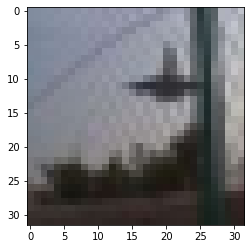

In [37]:
plt.imshow(X_test[random_image])

In [38]:
class_names[np.argmax(predictions[0])]

'truck'

## Etapa 8: Enviando a requisição POST para um modelo específico que está armazendo no servidor

In [39]:
specific_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data = data, headers = headers)

In [ ]:
specific_json_response